In [1]:
# from the baseline 2.2 run
import numpy as np
import matplotlib.pylab as plt
from rubin_sim.utils import ddf_locations

%matplotlib inline
from make_ddf_survey import optimize_ddf_times, generate_ddf_scheduled_obs

In [2]:
ddfs = ddf_locations()

ddf_data = np.load('ddf_grid.npz')
ddf_grid = ddf_data['ddf_grid'].copy()

ddf_name = 'XMM_LSS'

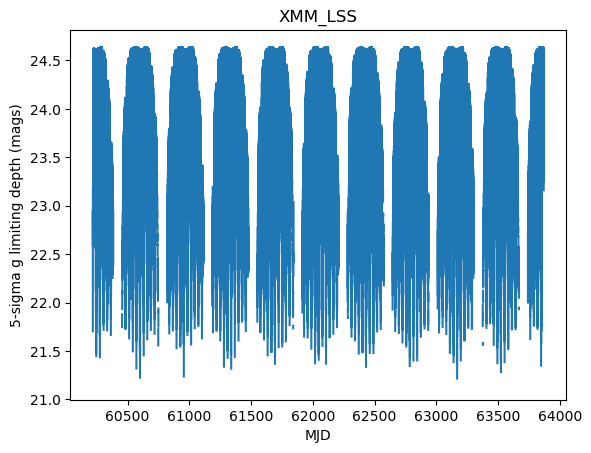

In [3]:
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name)
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
fig.savefig(ddf_name+'10years.pdf')

(61500.0, 62000.0)

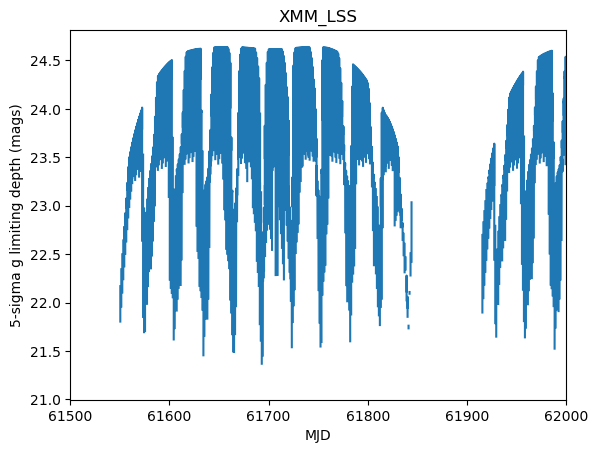

In [4]:
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name)
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61500, 62000])


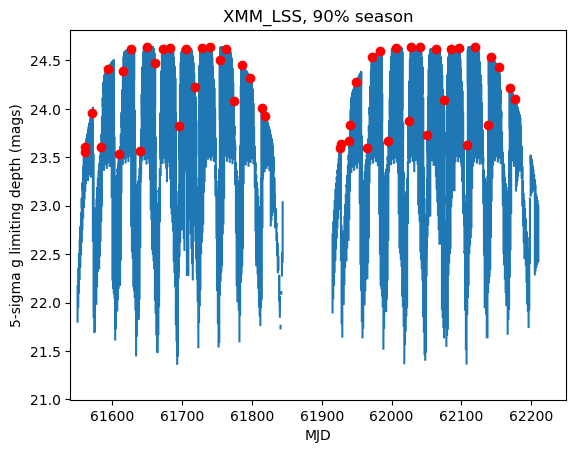

In [5]:
season_frac=0.1
sequence_limit=258
mjds = optimize_ddf_times(ddf_name, ddfs[ddf_name][0], ddf_grid,
                                  season_frac=season_frac,
                                  sequence_limit=sequence_limit)[0]
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name + ', %i%% season' % ((1-season_frac)*100))
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61540, 62250])

ax.plot(mjds, np.interp(mjds, ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g']), 'ro')

fig.savefig(ddf_name+'_%.1f.pdf' % season_frac)



In [6]:
n = np.ones(np.size(mjds))
cc_90 = np.cumsum(n)
mjd_90 = np.array(mjds) + 0

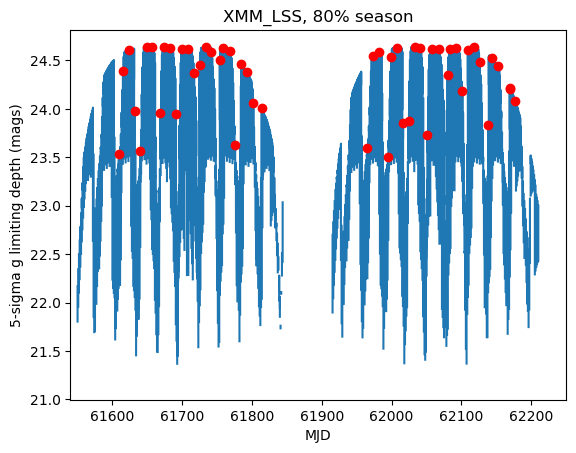

In [7]:
season_frac=0.2
sequence_limit=258
mjds = optimize_ddf_times(ddf_name, ddfs[ddf_name][0], ddf_grid,
                                  season_frac=season_frac,
                                  sequence_limit=sequence_limit)[0]
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name + ', %i%% season' % ((1-season_frac)*100))
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61540, 62250])

ax.plot(mjds, np.interp(mjds, ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g']), 'ro')
fig.savefig(ddf_name+'_%.1f.pdf' % season_frac)

n = np.ones(np.size(mjds))
cc_80 = np.cumsum(n)
mjd_80 = np.array(mjds) + 0

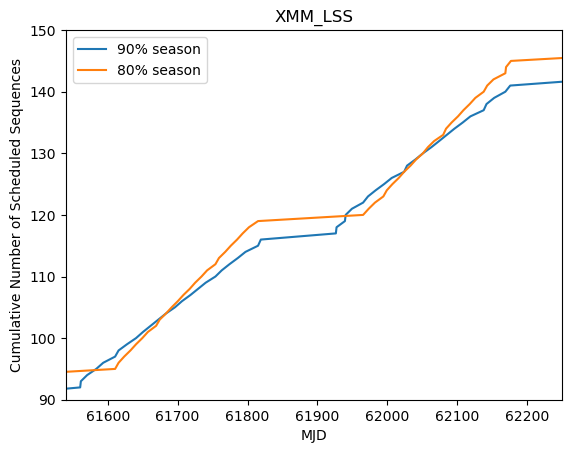

In [8]:
fig, ax = plt.subplots()

ax.plot(mjd_90, cc_90, label='90% season')
ax.plot(mjd_80, cc_80, label='80% season')
ax.set_xlim([61540, 62250])
ax.set_ylim([90, 150])

ax.set_xlabel('MJD')
ax.set_ylabel('Cumulative Number of Scheduled Sequences')
ax.legend()
ax.set_title(ddf_name )
fig.savefig(ddf_name + 'cumulative.pdf')